In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

%matplotlib inline

In [2]:
jobs_data = pd.read_csv(
    "data/stackoverflow/data-science-jobs.csv"
)

In [3]:
jobs_data.head()

,skills,description
0,"python, r, amazon-web-services, statistics, we...",<p>Apsara Capital is the only investment firm ...
1,"python, r, sql, pandas, mysql","<p>As a startup with significant funding, we a..."
2,"data-science, spark-streaming, hadoop",<p>Wie gestalte ich das Daten-&Ouml;kosystem v...
3,"data-science, machine-learning, r",As a Lead Data Scientist you manage the team c...
4,"python-3.x, jupyter-notebook, mysql, pandas, s...",<p>Dans le cadre du d&eacute;veloppement de se...


In [22]:
from collections import Counter

skills = jobs_data["skills"].dropna()
skills_list = skills.str.split(",").as_matrix().flat
single_skills_list = [item.strip(" ") for sublist in skills_list for item in sublist]

occurences = Counter(single_skills_list)
sorted_occurences = occurences.most_common()

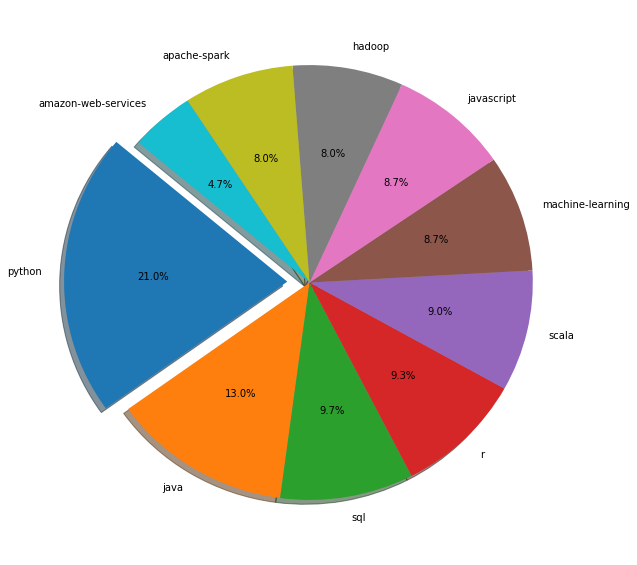

In [57]:
sorted_occurences_first_10 = sorted_occurences[:10]
sorted_occurences_dict = dict((x, y) for x, y in sorted_occurences_first_10)
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0)
fig = plt.figure(figsize=(10,10))
plt.pie([float(v) for v in sorted_occurences_dict.values()], labels=[k for k in sorted_occurences_dict],
            autopct='%1.1f%%', explode=explode, shadow=True, startangle=140)
plt.savefig('data/stackoverflow/skills.png')


In [49]:
description = jobs_data["description"].dropna()
description_degree = description.str.lower().str.contains('degree').value_counts()
description_degree

False    121
True      40
Name: description, dtype: int64

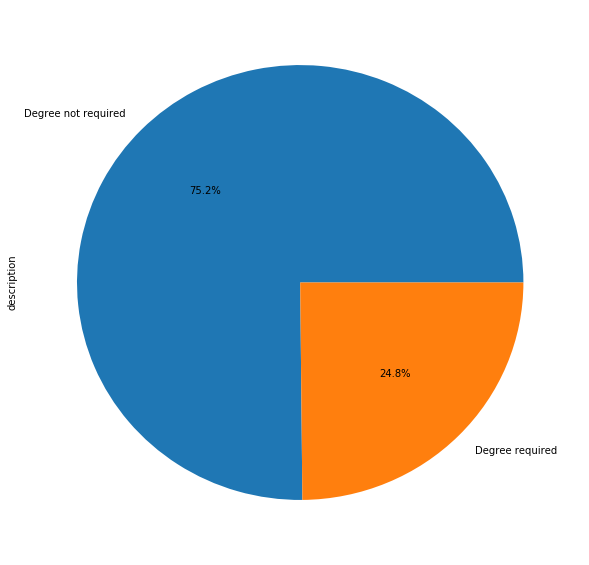

In [58]:

fig = plt.figure(figsize=(10,10))
description_degree.plot(kind="pie", labels=["Degree not required","Degree required"], autopct='%1.1f%%')
plt.savefig('data/stackoverflow/degree.png')
